In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### tweet1,article1 are outputs after epoch 1 (starting epoch 0), and tweet2, article2

In [23]:
tweet1 = pd.read_csv("../outputs/tweet_ahsg-epoch-1.csv")
article1 = pd.read_csv("../outputs/article_ahsg-epoch-1.csv")

tweet2 = pd.read_csv("../outputs/tweet_ahsg-epoch-2.csv")
article2 = pd.read_csv("../outputs/article_ahsg-epoch-2.csv")

In [3]:
def evaluate_this_dataframe(df, threshold=0.5):
    print("F1 Score: ", f1_score(df.y_true.values, df.y_pred.values >= threshold, average='weighted'))
    print("Accuracy Score: ", accuracy_score(df.y_true.values, df.y_pred.values >= threshold))

In [4]:
def evaluate_this_dataframe_and_plot(df, threshold=0.5):
    X = np.arange(0., 1.0, 0.01)
    Y_acc, Y_f1 = [], []
    for threshold in X:
        Y_f1.append(f1_score(df.y_true.values, df.y_pred.values >= threshold, average = 'weighted'))
        Y_acc.append(accuracy_score(df.y_true.values, df.y_pred.values >= threshold))
    best_f1 = max(Y_f1)
    best_threshold = X[Y_f1.index(best_f1)]
    print("Best threshold value found was: ",best_threshold, "  with an f1 score of: ", best_f1)
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].plot(X,Y_f1)
    axs[0].set_ylabel("f1 score")
    axs[0].set_xlabel("Threshold value")
    axs[1].plot(X,Y_acc)
    axs[1].set_ylabel("acc score")
    axs[1].set_xlabel("Threshold value")
    plt.tight_layout()

In [24]:
tweet = pd.read_pickle("../data/tweet_dev_cleaned.pkl")
article = pd.read_pickle("../data/article_dev_cleaned.pkl")

# article1.loc[[231, 238],'y_true'] = 0
# article1.drop([61,129, 177,411,421,427], inplace=True)

# article2.loc[[231, 238],'y_true'] = 0
# article2.drop([61,129, 177,411,421,427], inplace=True)

# article.loc[[231, 238],'Mobile_Tech_Flag'] = 0
# article.drop([61,129, 177,411,421,427], inplace=True)

In [6]:
evaluate_this_dataframe(tweet1)
evaluate_this_dataframe(article1)

F1 Score:  0.9960499574516881
Accuracy Score:  0.996039603960396
F1 Score:  0.9696300663008625
Accuracy Score:  0.969939879759519


Best threshold value found was:  0.32   with an f1 score of:  0.9960499574516881
Best threshold value found was:  0.18   with an f1 score of:  0.9781627587269274


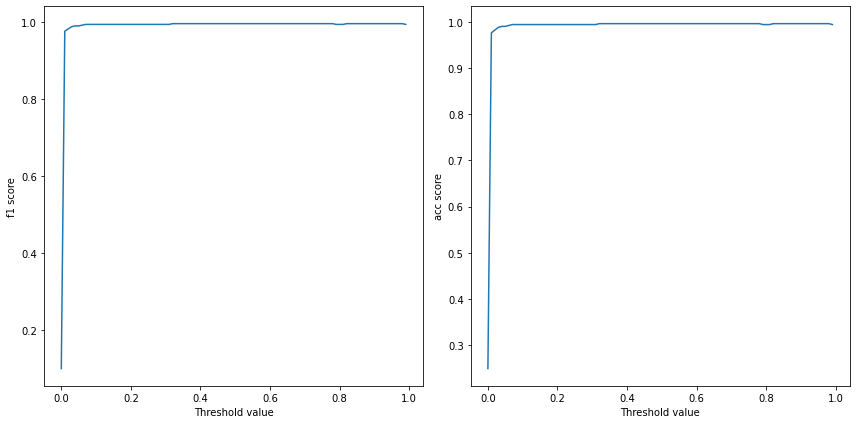

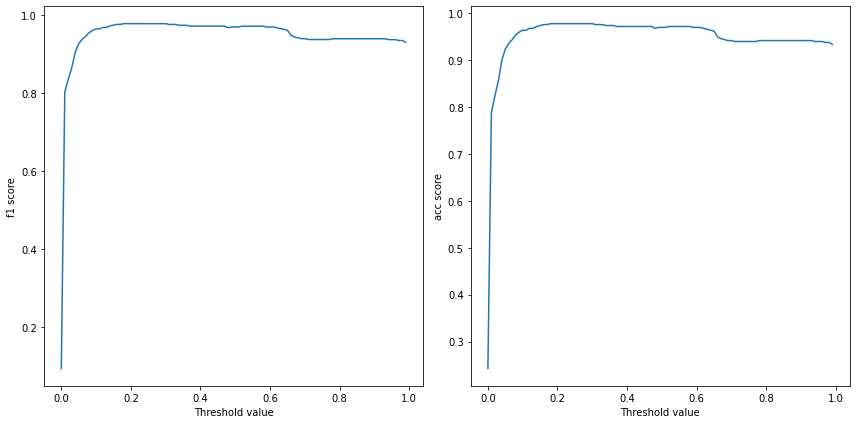

In [7]:
evaluate_this_dataframe_and_plot(tweet1)
evaluate_this_dataframe_and_plot(article1)

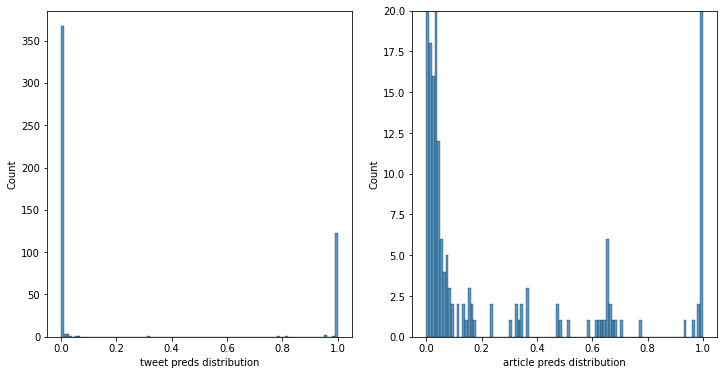

In [8]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.histplot(tweet1.y_pred.values, bins=100, ax=axs[0])
sns.histplot(article1.y_pred.values, bins=100, ax=axs[1])
axs[0].set_xlabel("tweet preds distribution")
axs[1].set_xlabel("article preds distribution")

plt.ylim(0,20);

In [9]:
evaluate_this_dataframe(tweet2)
evaluate_this_dataframe(article2)

F1 Score:  0.9960499574516881
Accuracy Score:  0.996039603960396
F1 Score:  0.9779247373647958
Accuracy Score:  0.9779559118236473


Best threshold value found was:  0.98   with an f1 score of:  1.0
Best threshold value found was:  0.2   with an f1 score of:  0.9841387159345428


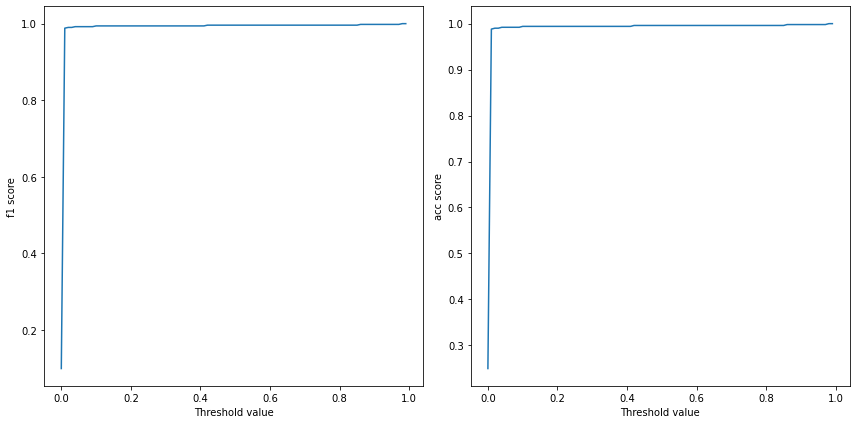

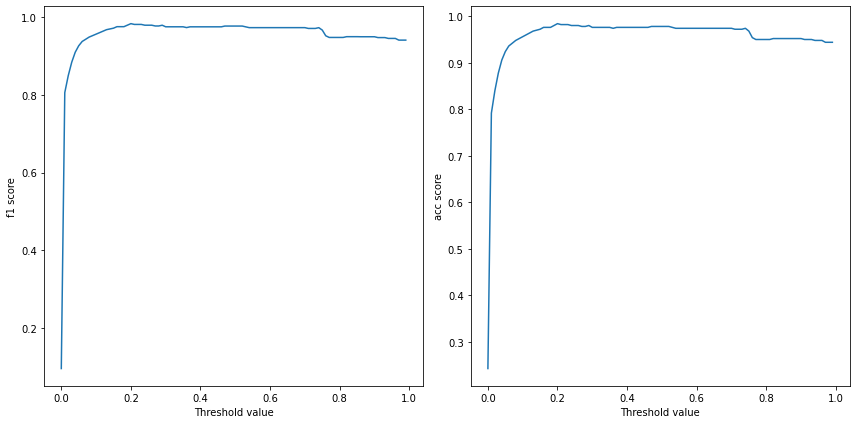

In [10]:
evaluate_this_dataframe_and_plot(tweet2)
evaluate_this_dataframe_and_plot(article2)

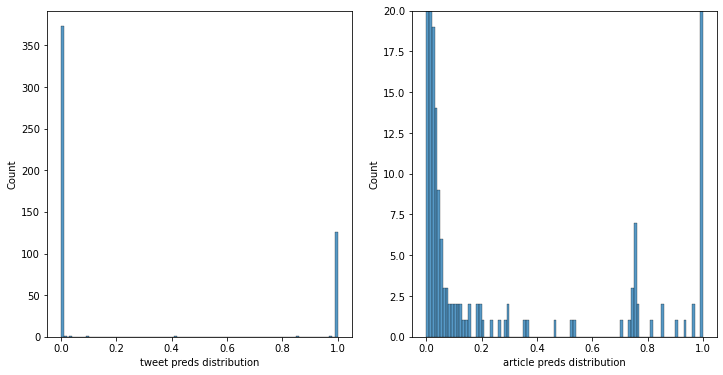

In [11]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.histplot(tweet2.y_pred.values, bins=100, ax=axs[0])
sns.histplot(article2.y_pred.values, bins=100, ax=axs[1])
axs[0].set_xlabel("tweet preds distribution")
axs[1].set_xlabel("article preds distribution")

plt.ylim(0,20);

Best threshold value found was:  0.2   with an f1 score of:  0.9891230569248208


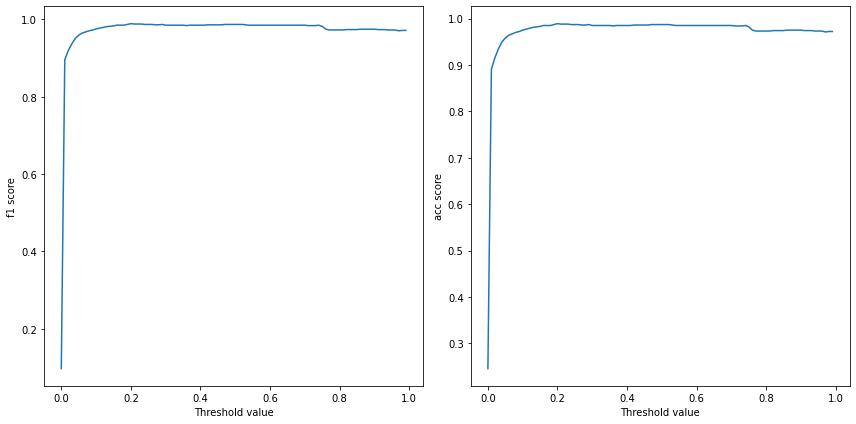

In [12]:
combined = pd.concat([tweet2, article2])
evaluate_this_dataframe_and_plot(combined)

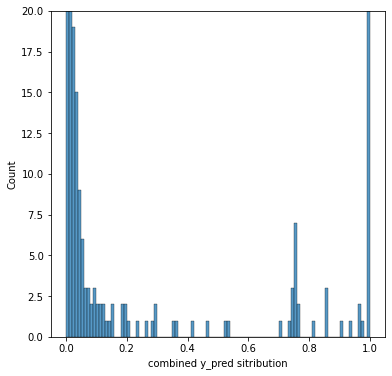

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(combined.y_pred.values, bins=100);
plt.xlabel("combined y_pred sitribution");
plt.ylim(0,20);

In [14]:
confusion_matrix(combined.y_true.values, combined.y_pred.values>0.2)

array([[746,  11],
       [  0, 247]])

In [15]:
confusion_matrix(article2.y_true.values, article2.y_pred.values>0.2)

array([[370,   8],
       [  0, 121]])

## NOTE: False Positives are the issue here

In [18]:
print(classification_report(article2.y_true.values, article2.y_pred.values>0.2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       384
           1       0.90      1.00      0.95       121

    accuracy                           0.97       505
   macro avg       0.95      0.98      0.96       505
weighted avg       0.98      0.97      0.97       505



In [30]:
false_preds_idx = article2.loc[(article2['y_pred']>=0.5)!=article2['y_true']].index
article.loc[:,"y_preds"] = article2.y_pred.values

In [31]:
article.loc[false_preds_idx]

,Text_ID,Text,Headline,Mobile_Tech_Flag,urls,y_preds
57,article_0564,New Delhi: Data companies are going to find ev...,Data Companies To Become More Intrusive In 202...,0,[],0.817520
68,article_3292,Japanese entertainment company Akatsuki Inc ha...,"Japan's Akatsuki eyes JV partner in India, pla...",1,[],0.204366
134,article_3011,This website uses cookies to improve your expe...,Easing Regulations Open the Door for Innovativ...,1,[],0.268148
242,article_2436,2 सितंबर ये 118 ऐप्स किये गए बैन APUS Launcher...,2020 में भारत सरकार ने किया स्मार्टफोन में चीन...,0,[],0.996618
270,article_2792,"तुर्की के बाद दूसरे नंबर पर न्यूजीलैंड है, जहा...",लेटेस्ट\n पूरी दुनिया के मुकाबले भा...,0,[],0.859735
276,article_2041,प्रतीकात्मक तस्वीर (Photo Credit-Twitter) नई द...,Techno: टेक्नो ने भारत में किया 48MP Dual Self...,0,[],0.998861
277,article_3622,Sign in Welcome! Log into your account your us...,जाने भारत में बिकने वाले बेस्ट कैमरे वाले मोबा...,1,[],0.291157
318,article_3327,GlobeNewswire Top Companies in Global Refracto...,"Poco M3 with 6,000mAh Battery Launched in Indi...",1,[https://www.marketresearchfuture.com/sample_r...,0.353328
340,article_2976,नेशनल पेमेंट्स कॉरपोरेशन ऑफ इंडिया (NPCI) ने ग...,is google pay digital payment app banned in in...,0,[https://t.co/7sQv2A3mzS],0.738409
365,article_3733,Sign in Welcome! Log into your account your us...,64MP ट्रिपल रियर कैमरे के साथ Vivo S7e 5G लॉन्...,1,[],0.291157


In [32]:
article.loc[false_preds_idx, "Headline"].to_list()

['Data Companies To Become More Intrusive In 2021: Report',
 "Japan's Akatsuki eyes JV partner in India, plans to set up local office - Exchange4media",
 'Easing Regulations Open the Door for Innovative Betting Solutions',
 '2020 में भारत सरकार ने किया स्मार्टफोन में चीनी कम, बैन किये ये 267 ऐप्स',
 'लेटेस्ट\\n            पूरी दुनिया के मुकाबले भारत में घर खरीदना हुआ आसान, इतनी कम हो गई कीमतें',
 'Techno: टेक्नो ने भारत में किया 48MP Dual Selfie Camera वाला नया स्मार्टफोन लॉन्च',
 'जाने भारत में बिकने वाले बेस्ट कैमरे वाले मोबाइल फ़ोन कौन से है ?',
 'Poco M3 with 6,000mAh Battery Launched in India at Rs 10,999; Check Price, Features, Variants & Specifications',
 'is google pay digital payment app banned in india by RBI as per social media know truth– News18 Hindi',
 '64MP ट्रिपल रियर कैमरे के साथ Vivo S7e 5G लॉन्च, जानें फ़ीचर्स',
 'The evolution of mobile productivity, even when we’re a little less mobile']

In [37]:
for a in article.loc[false_preds_idx,'Text'].to_list():
    print(a, "\n\n\n")

New Delhi: Data companies are going to find ever more creative, and sometimes more intrusive, sources of data to fuel their AI-driven behavioural analytics systems in 2021, according to a new report.  As users find themselves in a fix over how to safeguard their personal data from being mined by tech giants, a Kaspersky report said that finally, public awareness of the perils of unfettered data collection is growing, and the free market is taking notice.  Apple has publicly clashed with Facebook claiming it has to protect its users' privacy, while the latter is wrestling with regulators to implement end-to-end encryption in its messaging apps.  "People are more and more willing to choose services that have at least a promise of privacy, and even pay for them," said the report from the global cybersecurity firm.  Security vendors are promoting privacy awareness, backing it with privacy-oriented products.  "The incumbent privacy-oriented services like DuckDuckGo show they can have a sust

In [35]:
tweet = pd.read_pickle("../data/tweet_dev_cleaned.pkl")
tweet_false_preds_idx = tweet2.loc[(tweet2['y_pred']>=0.5)!=tweet2['y_true']].index
tweet.loc[:,"y_preds"] = tweet2.y_pred.values

In [36]:
tweet.loc[tweet_false_preds_idx]

,Tweet_ID,Tweet,Mobile_Tech_Tag,hashtags,mentions,Tweet_with_emoji_desc,y_preds
133,tweet_1917,Android हो या हो iPhone अपनी औकात है सिर्फ ban...,0,[],[@ShrishtySays],Android हो या हो iPhone अपनी औकात है सिर्फ ban...,0.974329
299,tweet_0827,#NowPlaying The Bottle by Joe Bataan! Find us ...,0,"[#NowPlaying, #Funk, #DiscoMusic, #Oldies, #70...",[],#NowPlaying The Bottle by Joe Bataan! Find us ...,0.855909


Both are False Positives

In [57]:
tweet.loc[tweet_false_preds_idx, 'Tweet_with_emoji_desc'].to_list()

['Android हो या हो iPhone अपनी औकात है सिर्फ bank loan..:beaming face with smiling eyes:',
 '#NowPlaying The Bottle by Joe Bataan! Find us at CRR App: Google Play Apple Micro-site: Web Page #Funk #DiscoMusic #Oldies #70s #DiscoNights #OldiesButGoodies']